In [1]:
# Importing necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf

# Load the dataset
url = "https://static.bc-edx.com/data/dl-1-2/m21/lms/starter/charity_data.csv"
df = pd.read_csv(url)

# Display the first few rows of the dataframe
df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [2]:
# Drop non-beneficial columns
df = df.drop(columns=['EIN', 'NAME'])

In [3]:
# Determine the number of unique values in each column
print(df.nunique())

APPLICATION_TYPE            17
AFFILIATION                  6
CLASSIFICATION              71
USE_CASE                     5
ORGANIZATION                 4
STATUS                       2
INCOME_AMT                   9
SPECIAL_CONSIDERATIONS       2
ASK_AMT                   8747
IS_SUCCESSFUL                2
dtype: int64


In [4]:
# Look at APPLICATION_TYPE value counts for binning
app_type_count = df['APPLICATION_TYPE'].value_counts()
app_type_count


APPLICATION_TYPE
T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T29        2
T15        2
T17        1
Name: count, dtype: int64

In [6]:
# Choose a cutoff value and create a list of application types to be replaced
# use the variable name `application_types_to_replace`
application_types_to_replace = list(app_type_count[app_type_count < 500].index)

# Replace in dataframe
for app in application_types_to_replace:
    df['APPLICATION_TYPE'] = df['APPLICATION_TYPE'].replace(app,"Other")

# Check to make sure binning was successful
df['APPLICATION_TYPE'].value_counts()

APPLICATION_TYPE
T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
Other      276
Name: count, dtype: int64

In [7]:
# Look at CLASSIFICATION value counts for binning
class_count = df['CLASSIFICATION'].value_counts()
class_count

CLASSIFICATION
C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C4120        1
C8210        1
C2561        1
C4500        1
C2150        1
Name: count, Length: 71, dtype: int64

In [8]:
# Convert categorical data to numeric with `pd.get_dummies`
numeric_app_df = pd.get_dummies(df, dtype=int)
numeric_app_df

,STATUS,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1,5000,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,1,108590,1,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,1,0
2,1,5000,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
3,1,6692,1,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
4,1,142590,1,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34294,1,5000,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
34295,1,5000,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
34296,1,5000,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
34297,1,5000,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0


In [9]:
# Split our preprocessed data into our features and target arrays
y = numeric_app_df['IS_SUCCESSFUL']
x = numeric_app_df.drop(['IS_SUCCESSFUL'], axis = 1)

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state = 78)

In [11]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

## Compile, Train and Evaluate the Model

In [12]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
hidden_node_layer1 = 70
hidden_node_layer2 = 51
number_input_features = len(X_train_scaled[0])

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units = hidden_node_layer1, activation = 'relu', input_dim = number_input_features))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units = hidden_node_layer2, activation = 'relu'))

# Output layer
nn.add(tf.keras.layers.Dense(units = 1, activation = 'sigmoid'))

# Check the structure of the model
nn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 70)                7630      
                                                                 
 dense_1 (Dense)             (None, 51)                3621      
                                                                 
 dense_2 (Dense)             (None, 1)                 52        
                                                                 
Total params: 11303 (44.15 KB)
Trainable params: 11303 (44.15 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [13]:
# Compile the model
nn.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [14]:
# Train the model
fit_model = nn.fit(X_train_scaled, y_train, epochs = 130)

Epoch 1/130
804/804 [==============================] - 2s 2ms/step - loss: 0.5748 - accuracy: 0.7210
Epoch 2/130
804/804 [==============================] - 2s 3ms/step - loss: 0.5522 - accuracy: 0.7317
Epoch 3/130
804/804 [==============================] - 1s 2ms/step - loss: 0.5484 - accuracy: 0.7336
Epoch 4/130
804/804 [==============================] - 1s 2ms/step - loss: 0.5465 - accuracy: 0.7328
Epoch 5/130
804/804 [==============================] - 1s 2ms/step - loss: 0.5451 - accuracy: 0.7351
Epoch 6/130
804/804 [==============================] - 1s 2ms/step - loss: 0.5441 - accuracy: 0.7347
Epoch 7/130
804/804 [==============================] - 1s 2ms/step - loss: 0.5432 - accuracy: 0.7353
Epoch 8/130
804/804 [==============================] - 1s 2ms/step - loss: 0.5418 - accuracy: 0.7373
Epoch 9/130
804/804 [==============================] - 1s 2ms/step - loss: 0.5416 - accuracy: 0.7367
Epoch 10/130
804/804 [==============================] - 2s 2ms/step - loss: 0.5408 - accura

In [15]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose = 2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 1s - loss: 0.5895 - accuracy: 0.7273 - 818ms/epoch - 3ms/step
Loss: 0.5895169377326965, Accuracy: 0.7273469567298889


<Axes: >

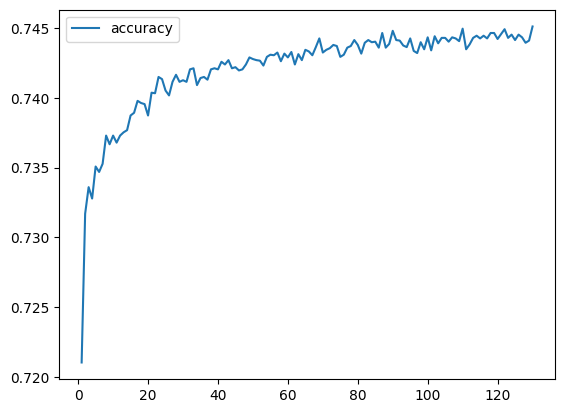

In [16]:
# Plot the accuracy
attempt1_df = pd.DataFrame(fit_model.history, index = range(1, len(fit_model.history['loss'])+1))
attempt1_df.plot(y = 'accuracy')

## Target higher than 75% was not reached


In [18]:
# Export our model to HDF5 file
nn.save("AlphabetSoupCharity_Optimizatio_2.h5")